# Tarea 1 - Programación Avanzada
Nombre: Ricardo Salas Espiñeira


## Preguntas teóricas

1. ¿Qué es un paradigma de programación?

    **R:** Un paradigma de programación es una forma de organizar y razonar sobre los programas. Un ejemplo de esto es la programación orientada objetos.

2. ¿En qué se basa la programación orientada a objetos?

    **R:** La programación orientada a objetos permite crear instancias de clases, llamadas objetos. Las clases definen atributos y métodos que los objetos pueden tener. La creación de programas involucra la creación de objetos y la interacción entre ellos.

3. ¿Cuál es la diferencia entre recursividad e iteración, y cómo se relaciona esto con la notación big 𝑂?

    **R:** Una función se dice recursiva si la función se llama a si misma de forma directa o indirecta. Esto permite dividir el problema en otros más pequeños y de menor complejidad. Por otro lado, las funciones iterativas presentan una secuencia de instrucciones que se repiten varias veces, generalmente mediante el uso de bucles como `for` y `while`. Un mismo problema puede ser resuelto de forma iterativa o recursiva. Se puede saber que implementación es más eficiente en terminos de su complejidad mediante la notación big O. Por lo general la iteración tiene una complejidad O(n), donde n es la cantidad de veces que se realiza el bucle. Por otra parte, la recursividad tiene una complejidad que depende del problema y del algoritmo que se utilice para resolver dicho problema. 
    
    Por ejemplo, si se busca encontrar el máximo valor dentro de un arreglo de largo n, una solución iterativa deberá recorrer todo el arreglo, lo cual presenta una complejidad O(n). Implementar el algoritmo recursivo de dividir para reinar permite solucionar este problema en tiempo O(log(n)). 

    En contraparte, si queremos calcular la serie de Fibonacci, una solución recursiva tendría una complejidad de O(n^2), mientras que la iterariva O(n).

4. Explicar la diferencia de rendimiento entre 𝑂(1) y 𝑂(𝑛)

    **R:** La notación O(1) representa una complejidad constante, por lo que el tiempo de ejecución de un algoritmo no depende del tamaño de la entrada. Este es un rendimiento ideal para un algoritmo, puesto que aumentar el tamaño de la entrada no perjudica el tiempo de ejecución. Por otro lado, la notación O(n) representa complejidad lineal, donde el tiempo de ejecución del algoritmo aumenta linealmente con el tamaño de la entrada. O(1) presenta un mejor rendimiento que O(n).

5. ¿Cómo se calcula el orden en un programa que funciona por etapas?
    
    **R:** Se debe calcular la complejidad de cada etapa. La complejidad del programa será la complejidad de la etapa dominante, es decir, aquella que sea más costosa (más compleja).


6. ¿Cómo se puede determinar la complejidad temporal de un algoritmo recursivo?

    **R:** Se debe definir la ecuación de recurrencia del algoritmo. Esta se construye a partir del caso base (por lo general de complejidad constante) y los subproblemas. Luego, se debe resolver la ecuación utilizando el teorema maestro.

In [14]:
from functools import wraps
import time
import math

In [ ]:
# Definimos la clase caminos_PCB
class caminos_PCB:

    def __init__(self, N, M):
        self.N = N
        self.M = M
    
    def contar


    

In [4]:
import time
from functools import wraps
import math

class PCBPaths:
    def __init__(self, N, M):
        self.N = N
        self.M = M
    
    def count_paths_recursive(self, i=0, j=0):
        if i == self.N - 1 and j == self.M - 1:
            return 1
        if i >= self.N or j >= self.M:
            return 0
        return self.count_paths_recursive(i + 1, j) + self.count_paths_recursive(i, j + 1)
    
    def count_paths_combinatorial(self):
        n = self.N + self.M - 2  # Total steps needed (right + down)
        k = self.N - 1  # Steps down (or steps right)
        return math.comb(n, k)
    
    def timer_decorator(func):
        @wraps(func)
        def wrapper(self, *args, **kwargs):
            start_time = time.time()
            result = func(self, *args, **kwargs)
            end_time = time.time()
            print(f"Execution time of {func.__name__}: {end_time - start_time:.6f} seconds")
            return result
        return wrapper

    @timer_decorator
    def timed_count_paths_recursive(self):
        return self.count_paths_recursive()
    
    @timer_decorator
    def timed_count_paths_combinatorial(self):
        return self.count_paths_combinatorial()

In [12]:
pcb = PCBPaths(20, 10)

# Calcular caminos usando recursión con temporización
print("Number of paths (recursive):", pcb.timed_count_paths_recursive())

# Calcular caminos usando la fórmula combinatoria con temporización
print("Number of paths (combinatorial):", pcb.timed_count_paths_combinatorial())

Execution time of timed_count_paths_recursive: 6.963931 seconds
Number of paths (recursive): 6906900
Execution time of timed_count_paths_combinatorial: 0.000000 seconds
Number of paths (combinatorial): 6906900


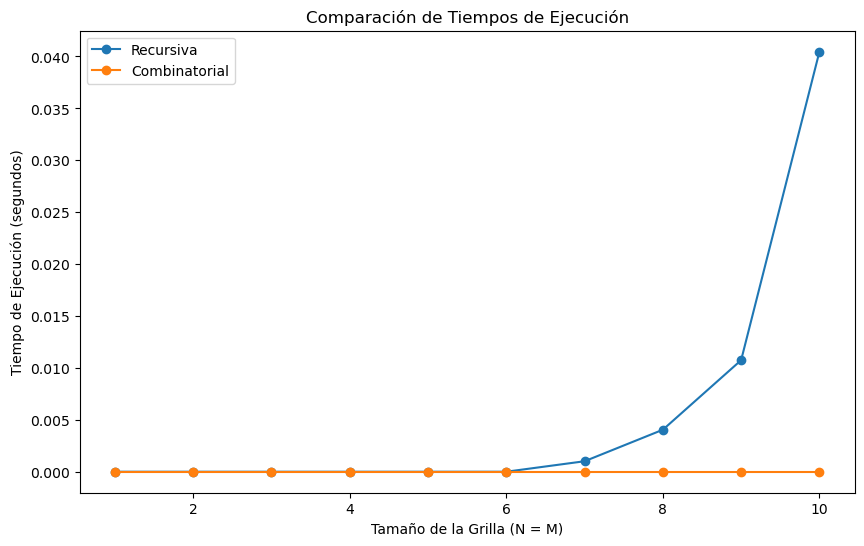

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Clase PCBPaths (de la implementación anterior)
# ...

def plot_execution_times():
    N_values = range(1, 11)  # Valores de N y M de 1 a 10
    recursive_times = []
    combinatorial_times = []

    for N in N_values:
        M = N  # Para simplificar, usamos N = M
        
        pcb = PCBPaths(N, M)

        # Tiempo de ejecución para la solución recursiva
        start_time = time.time()
        pcb.count_paths_recursive()
        end_time = time.time()
        recursive_times.append(end_time - start_time)

        # Tiempo de ejecución para la solución combinatoria
        start_time = time.time()
        pcb.count_paths_combinatorial()
        end_time = time.time()
        combinatorial_times.append(end_time - start_time)

    # Crear el gráfico
    plt.figure(figsize=(10, 6))
    plt.plot(N_values, recursive_times, label='Recursiva', marker='o')
    plt.plot(N_values, combinatorial_times, label='Combinatorial', marker='o')

    # Agregar título y leyenda
    plt.title('Comparación de Tiempos de Ejecución')
    plt.xlabel('Tamaño de la Grilla (N = M)')
    plt.ylabel('Tiempo de Ejecución (segundos)')
    plt.legend()

    # Guardar el gráfico en formato SVG
    plt.savefig('execution_times.svg', format='svg')

    # Mostrar el gráfico
    plt.show()

# Llamar a la función para generar el gráfico
plot_execution_times()